In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20.0,15.0  
mpl.rcParams['font.size'] = 20.0

In [20]:
itk_cluster = "../input_data/event000000001-measurements.csv" 
traccc_output = "event000000001-measurements.csv"

ITk_cluster = pd.read_csv(itk_cluster)
Traccc_output = pd.read_csv(traccc_output)

# Select only the relevant columns
columns_to_compare = ['local0', 'local1', 'var_local0', 'var_local1']
ITk_cluster_selected = ITk_cluster[columns_to_compare] # ITk_cluster
Traccc_output_selected = Traccc_output[columns_to_compare] # Traccc_output

ITk_cluster_selected.describe()

,local0,local1,var_local0,var_local1
count,368865.000000,368865.000000,3.688650e+05,3.688650e+05
mean,-0.097972,100.709240,2.500000e-03,2.500000e-03
std,17.242699,239.244554,2.310742e-14,2.310742e-14
min,-61.814900,-20.075000,2.500000e-03,2.500000e-03
25%,-9.950250,-5.875000,2.500000e-03,2.500000e-03
50%,-0.125000,0.000000,2.500000e-03,2.500000e-03
75%,9.824770,12.500000,2.500000e-03,2.500000e-03
max,61.652300,937.704000,2.500000e-03,2.500000e-03


In [21]:
Traccc_output_selected.describe()

,local0,local1,var_local0,var_local1
count,253988.000000,253988.000000,253988.000000,253988.000000
mean,-0.042101,-1.178343,0.001455,0.002210
std,10.087838,10.469687,0.049159,0.033742
min,-19.274900,-20.074900,0.000052,0.000208
25%,-7.853718,-9.019880,0.000211,0.000210
50%,-0.066840,-1.675000,0.000211,0.000487
75%,7.815490,6.758630,0.000719,0.000829
max,19.274900,20.074900,15.645900,11.787900


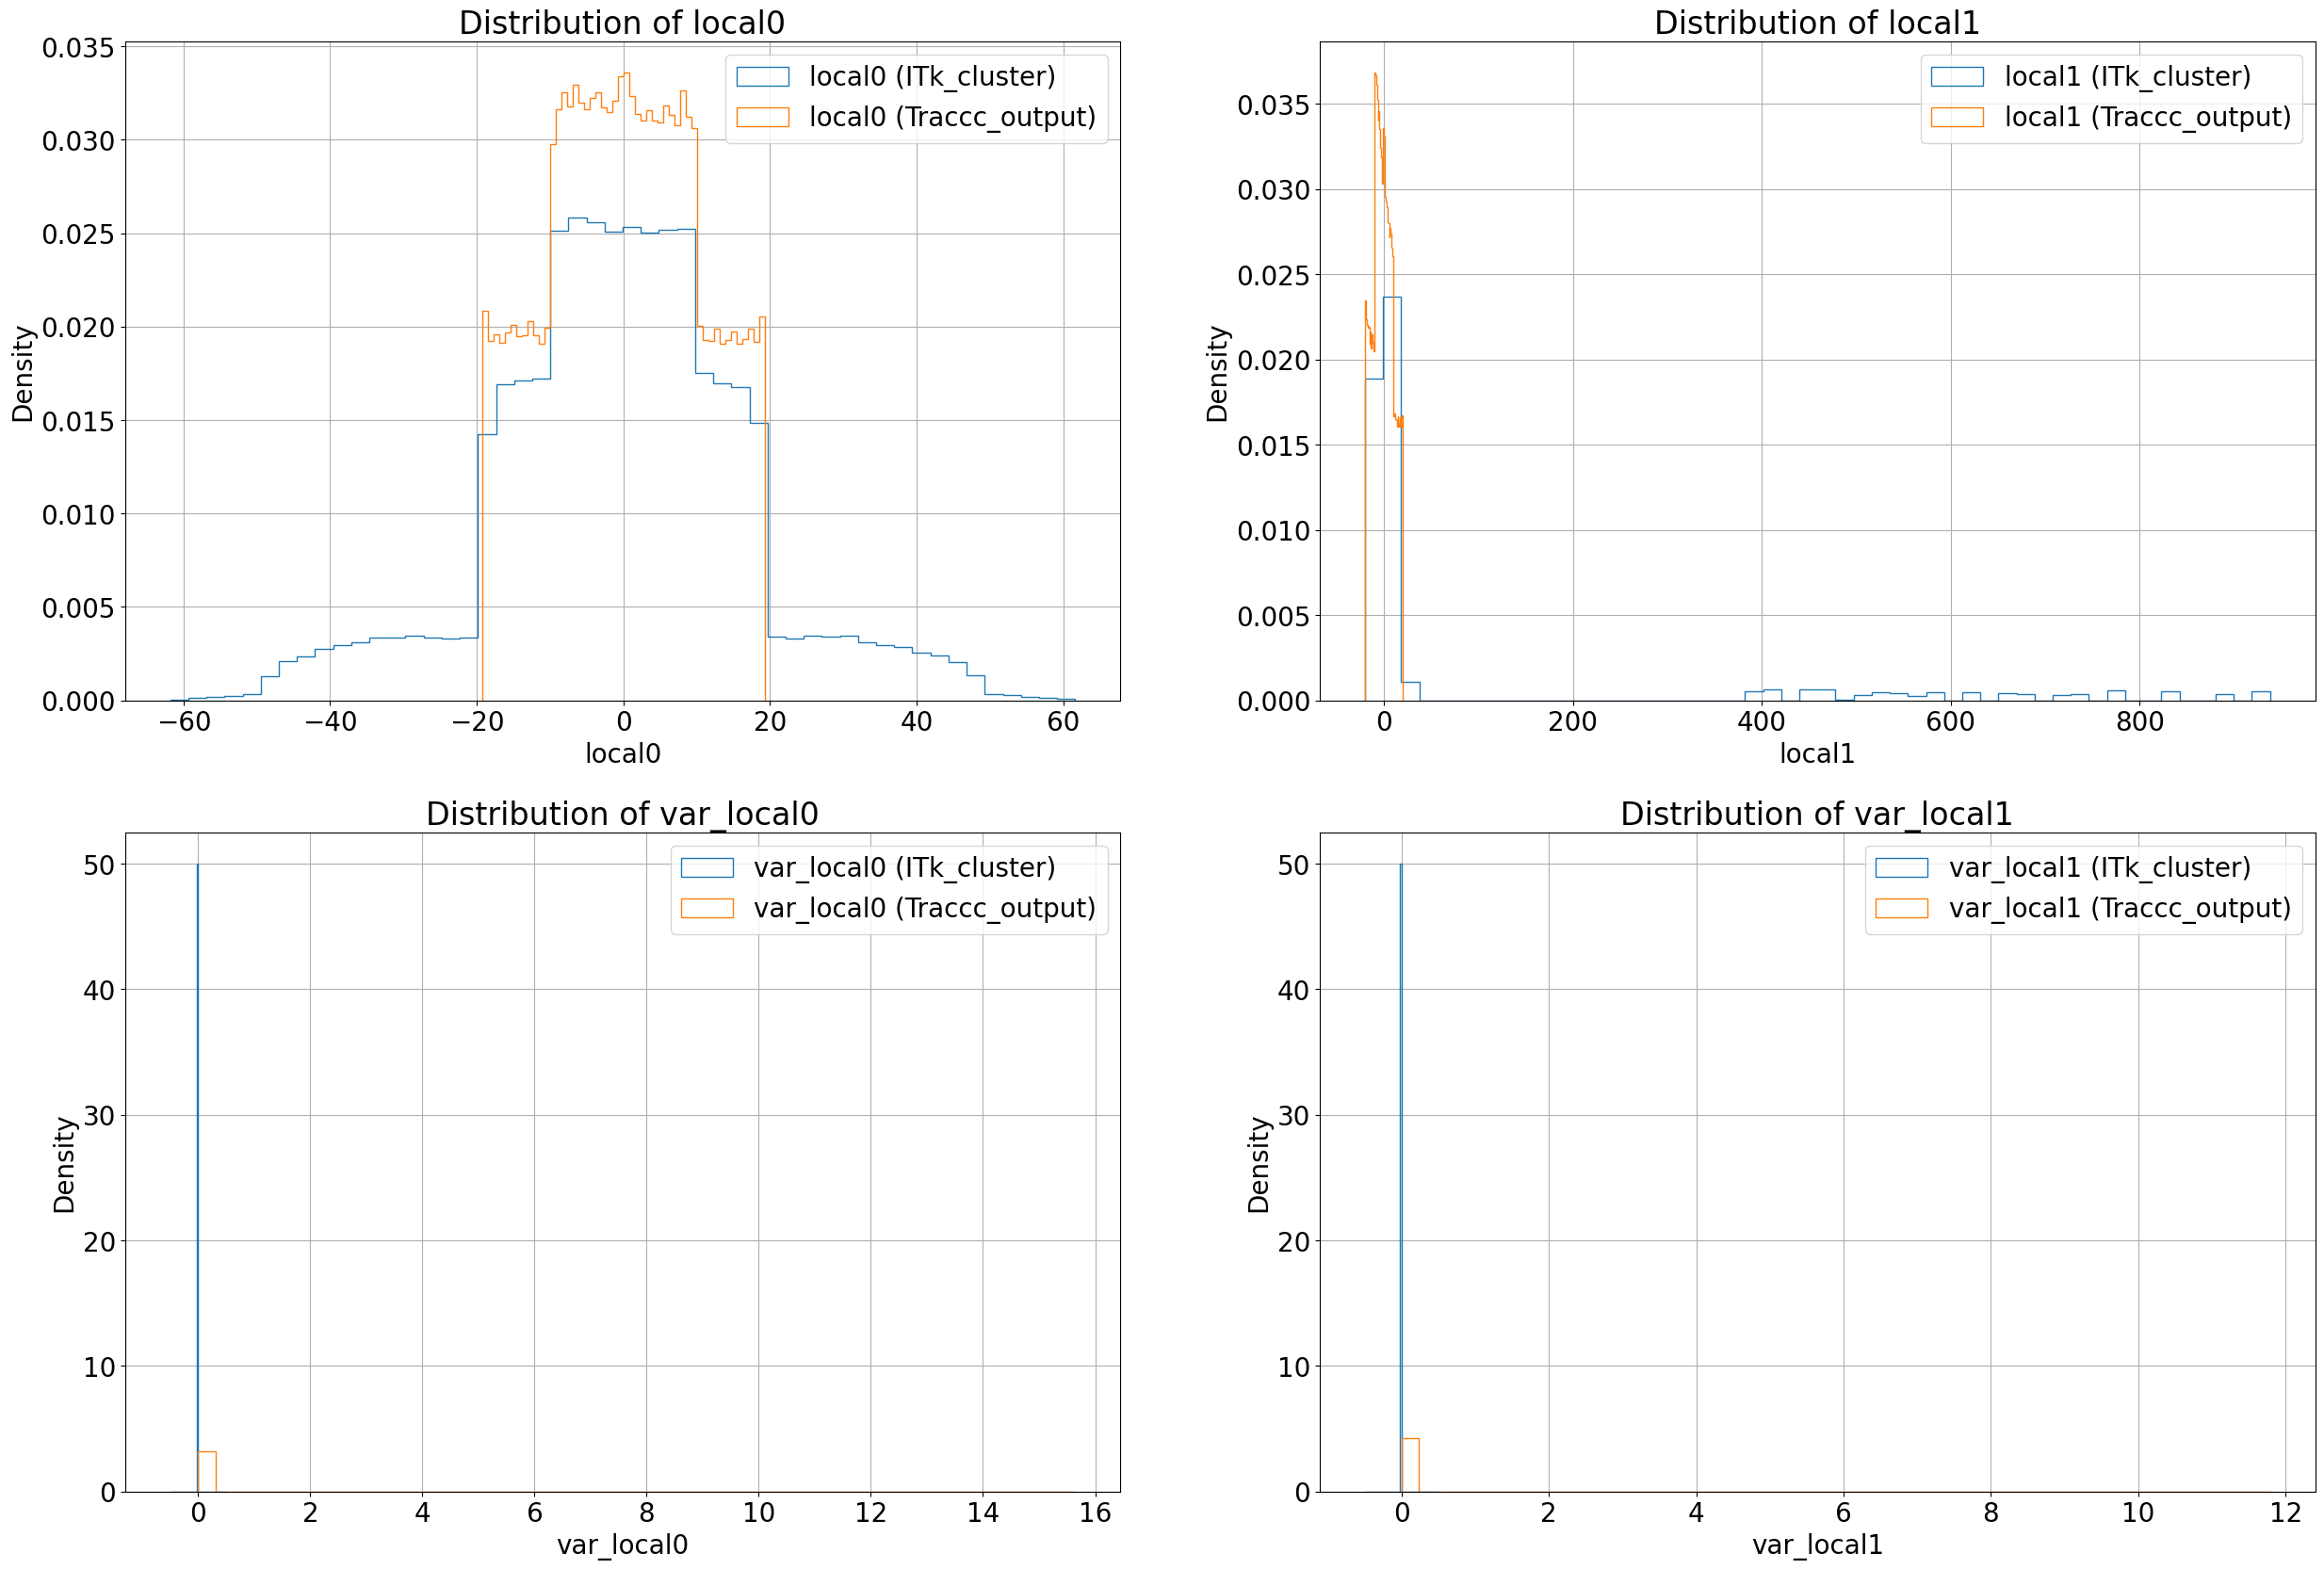

In [27]:

# Plotting
plt.figure(figsize=(30, 20))
for i in range(len(columns_to_compare)):
    plt.subplot(221+i)
    column = columns_to_compare[i]
    plt.hist(ITk_cluster_selected[column], bins=50, histtype='step', linewidth=1, label=f'{column} (ITk_cluster)', density=True)
    plt.hist(Traccc_output_selected[column], bins=50, histtype='step', linewidth=1, label=f'{column} (Traccc_output)', density=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
